Assignment 6 - Netflix Titles Data Wrangling
Using Pandas, Numpy, PostgresSQL

Psuedocode
- import netflix csv data
- transform data using Pandas or Numpy
- clean data using Pandas or Numpy
- export data using python or to PostgresSQL


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import netflix csv as dataframe
netflixdf = pd.read_csv("netflix_titles.csv")

# setting show_id column as index column
netflixdf = pd.read_csv("netflix_titles.csv", index_col=0)

# check shape of data frame
netflixdf.shape


(8807, 11)

In [4]:
# check top 10 rows of netflix dataframe
netflixdf.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [5]:
# checking the column types in netflixdf
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [6]:
# checking datatypes for the columns
netflixdf.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
# checking distinct values for each column in dataframe
netflixdf.nunique()

type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
#checking for NaN in columns of dataframe
nan_count = netflixdf.isna().sum()
nan_count

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# Column headers
netflixdf.head(0)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [10]:
# Strip white spaces from all object columns
object_columns = netflixdf.select_dtypes(['object']).columns
netflixdf[object_columns] = netflixdf[object_columns].apply(lambda x: x.str.strip())

# Ensure the data type of object columns remains as 'object'
netflixdf[object_columns] = netflixdf[object_columns].astype('object')


In [11]:
# Copy original DataFrame to avoid modifying it
netflixdf.replace('', ' ', inplace=True)
netflixdf

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [12]:
#checking for NaN in columns of dataframe
nan_count = netflixdf.isna().sum()
nan_count

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
# checking datatypes for the columns
netflixdf.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [14]:
# max character count for description column for ERD varchar count
# Finding the length of characters for each column
max_lengths = netflixdf.map(lambda x: len(str(x)))

# Displaying the maximum character lengths for each column - for dbms structure
print("Maximum lengths for each column:")
max_lengths.max()


Maximum lengths for each column:


type              7
title           104
director        208
cast            771
country         123
date_added       18
release_year      4
rating            8
duration         10
listed_in        79
description     248
dtype: int64

In [15]:
# displaying the unqiue values for the rating column
rating_unique = netflixdf.rating.unique()
rating_unique

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
# Create a boolean mask for rows that meet the condition ('74 min', '84 min', '66 min')
condition = netflixdf['rating'].isin(['74 min', '84 min', '66 min']) 
filtereddf = netflixdf[condition]
filtereddf


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [17]:
# Create a boolean mask for rows that meet the condition ('74 min', '84 min', '66 min')
condition = netflixdf['rating'].isin(['74 min', '84 min', '66 min'])

# Update 'duration' column and leave NaN in 'rating' column for the specified rows
netflixdf.loc[condition, 'duration'] = netflixdf.loc[condition, 'rating']

# Set NaN in 'rating' column for the specified rows
netflixdf.loc[condition, 'rating'] = np.nan

In [18]:
# displaying the unqiue values for the rating column
rating_unique1 = netflixdf.rating.unique()
rating_unique1

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [19]:
#checking for NaN in dataframe
nan_count1 = netflixdf.isna().sum()
nan_count1

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [20]:
# Updating date added column to match DB Time format yyyy-mm-dd
netflixdf['date_added'] = pd.to_datetime(netflixdf['date_added'], errors='coerce')

# Convert the pd.to_datetime values to the format of 'yyyy-mm-dd'
netflixdf['date_added'] = netflixdf['date_added'].dt.strftime('%Y-%m-%d')

# Display the DataFrame
netflixdf


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [21]:
#checking for NaN in dataframe to see if date_added increased or stayed the same
nan_count2 = netflixdf.isna().sum()
nan_count2

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## What Country has the most listed Titles?

In [22]:
# # Copy listed_indf_exploded DataFrame to avoid modifying it
countrydf = netflixdf.copy()

# Convert the 'country' column to lists by splits comma separated values
countrydf['country'] = countrydf['country'].str.split(', ')

# Explode country column cells
countrydf = countrydf.explode('country')

# Print exploded countrty DataFrame to verify 's8' has multiple listed in countries
countrydf.loc['s8']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ethiopia,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [23]:
# value count of the top countries which have the most shows listed in

ListedInCount = countrydf.copy()
# counting values and resetting the index and droping na values
ListedInCount = ListedInCount.country.value_counts(dropna=True).reset_index()
# Starts the index at 1 not 0
ListedInCount.index = ListedInCount.index + 1
#display dataframe
ListedInCount

,country,count
1,United States,3689
2,India,1046
3,United Kingdom,804
4,Canada,445
5,France,393
...,...,...
123,Bermuda,1
124,Ecuador,1
125,Armenia,1
126,Mongolia,1


In [24]:
# Top 5 Countries in Named columns
# names the ListedInCount columns 'Listed In Country', 'Country Count'
ListedInCount.columns = ['Listed In Country', 'Country Count']
ListedInCount.head(5)

,Listed In Country,Country Count
1,United States,3689
2,India,1046
3,United Kingdom,804
4,Canada,445
5,France,393


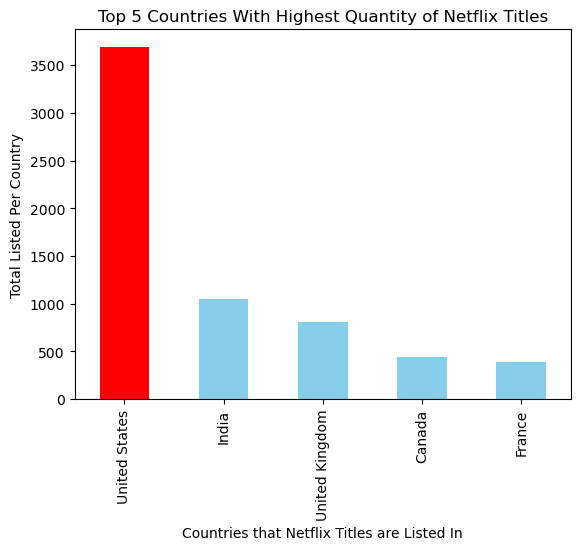

In [25]:
top_5_countries = ListedInCount.sort_values(by='Country Count', ascending=False).head(5)
# Plot the bar chart
# Set the color for the bar with the largest count
colors = ['red' if country == top_5_countries.iloc[0]['Listed In Country'] else 'skyblue' for country in top_5_countries['Listed In Country']]

top_5_countries.plot(kind='bar', x='Listed In Country', y='Country Count', color=colors, legend=False)
plt.xlabel('Countries that Netflix Titles are Listed In')
plt.ylabel('Total Listed Per Country')
plt.title('Top 5 Countries With Highest Quantity of Netflix Titles')
plt.show()

## What Actor appears the most in the Listed Titles?

In [46]:
# Copy original DataFrame to avoid modifying it
castdf_exploded = netflixdf.copy()

# Convert the 'cast' column to lists to be split
castdf_exploded['cast'] = castdf_exploded['cast'].str.split(', ')

# Explode specified columns
castdf_exploded = castdf_exploded.explode('cast')

# Drop the na
castdf_exploded.dropna(axis = 1, inplace=True)

# Print exploded DataFrame
castdf_exploded

,type,title,release_year,duration,listed_in,description
show_id,,,,,,
s1,Movie,Dick Johnson Is Dead,2020,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...
s8807,Movie,Zubaan,2015,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,2015,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,2015,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [27]:

# Create a boolean mask for rows where 'director' contains a comma
condition_director_comma = netflixdf['director'].str.contains(',', na=False)

# Apply the boolean mask to filter the DataFrame
director_comma_rows = netflixdf[condition_director_comma]

# Display the rows where 'director' contains a comma
director_comma_rows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,2021-09-17,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",Michael Schumacher,NaN,2021-09-15,2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...
...,...,...,...,...,...,...,...,...,...,...,...
s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",NaN,"United Kingdom, India, United States",2016-12-25,2013,NR,75 min,"Documentaries, International Movies",A small-town taxi driver is arranged to be mar...
s8729,Movie,When Two Worlds Collide,"Heidi Brandenburg, Mathew Orzel",NaN,"Peru, United States, United Kingdom",2016-11-30,2016,TV-14,103 min,"Documentaries, International Movies",This documentary takes a hard look at how indi...
s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,2019-02-01,2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...


In [28]:
# Copy castdf_exploded DataFrame to avoid modifying it
directordf_exploded = castdf_exploded.copy()

# Convert the 'cast' column to lists
directordf_exploded['director'] = directordf_exploded['director'].str.split(', ')

# Explode specified columns
directordf_exploded = directordf_exploded.explode('director')

# Print exploded DataFrame
directordf_exploded

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [29]:
# Copy directordf_exploded DataFrame to avoid modifying it
listed_indf_exploded = directordf_exploded.copy()

# Convert the 'cast' column to lists
listed_indf_exploded['listed_in'] = listed_indf_exploded['listed_in'].str.split(', ')

# Explode specified columns
listed_indf_exploded = listed_indf_exploded.explode('listed_in')

# Print exploded DataFrame
listed_indf_exploded

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...


In [30]:
# Copy listed_indf_exploded DataFrame to avoid modifying it
countrydf_exploded = listed_indf_exploded.copy()

# Convert the 'cast' column to lists
countrydf_exploded['country'] = countrydf_exploded['country'].str.split(', ')

# Explode specified columns
countrydf_exploded = countrydf_exploded.explode('country')

# Print exploded DataFrame
countrydf_exploded

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...


In [31]:
# copying countrydf_exploded dataframe to be new netflix dataframe
netexplodedf = countrydf_exploded.copy()
# list the first 20 rows to see if cells have been exploded
netexplodedf.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [32]:
# character count for each column now that the values are split into multiple rows for DB schema
# max character count for description column for ERD varchar count
# Finding the length of characters for each column
max_lengths = netexplodedf.map(lambda x: len(str(x)))

# Displaying the maximum lengths for each column
print("Maximum lengths for each column:")
max_lengths.max()

Maximum lengths for each column:


type              7
title           104
director         32
cast            100
country          20
date_added       10
release_year      4
rating            8
duration         10
listed_in        28
description     248
dtype: int64

In [33]:
#checking for NaN in columns of dataframe
nan_count = netexplodedf.isna().sum()
nan_count

type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             70
duration            0
listed_in           0
description         0
dtype: int64

In [34]:
# Copy original DataFrame to avoid modifying it
remove_doublespaces = netexplodedf.copy()

# verifying no double spaces enter in error
remove_doublespaces.replace('', ' ', inplace=True)
remove_doublespaces

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...
s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...


In [35]:
# New dataframe to prepare splitting director and actor names into Fname and LName
castsplit = remove_doublespaces.copy()

# Assuming df is your DataFrame

# Replace empty strings with a space in all columns and rows
castsplit.replace('', ' ', inplace=True)

# Function to split column and handle NaN values
def split_name(column):
    # Check if the value is not NaN
    if pd.notna(column):
        # Split the column using the first space and limit to 1 split
        return pd.Series(column.split(' ', 1))
    # Return empty strings if the value is NaN
    return pd.Series(['', ''])

# Split 'director' column
# Apply the split_name function to each non-NaN value in the 'director' column
# Create new columns 'Director_FName' and 'Director_LName' based on the split result
castsplit[['Director_FName', 'Director_LName']] = castsplit['director'].apply(split_name)

# Split 'actor' column
# Apply the split_name function to each non-NaN value in the 'actor' column
# Create new columns 'Actor_FName' and 'Actor_LName' based on the split result
castsplit[['Actor_FName', 'Actor_LName']] = castsplit['cast'].apply(split_name)

# Drop the original 'director' and 'actor' columns if needed
# This step removes the original columns, keeping only the new split columns
castsplit.drop(['director', 'cast'], axis=1, inplace=True)

# Print the modified DataFrame
castsplit


,type,title,country,date_added,release_year,rating,duration,listed_in,description,Director_FName,Director_LName,Actor_FName,Actor_LName
show_id,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten,Johnson,,
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",,,Ama,Qamata
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",,,Ama,Qamata
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",,,Ama,Qamata
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",,,Khosi,Ngema
...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez,Singh,Anita,Shabdish
s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez,Singh,Anita,Shabdish
s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez,Singh,Chittaranjan,Tripathy


In [36]:
# copy dataframe to final form dataframe
finaldf = castsplit.copy()



In [37]:
# Remove 's' from the index and convert to integers
finaldf.index = finaldf.index.map(lambda x: int(x[1:]) if x.startswith('s') else None)

# Rename the index to 'Title_ID'
finaldf.index.name = 'Title_ID'

finaldf

,type,title,country,date_added,release_year,rating,duration,listed_in,description,Director_FName,Director_LName,Actor_FName,Actor_LName
Title_ID,,,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten,Johnson,,
2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",,,Ama,Qamata
2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",,,Ama,Qamata
2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",,,Ama,Qamata
2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",,,Khosi,Ngema
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,Mozez,Singh,Anita,Shabdish
8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...,Mozez,Singh,Anita,Shabdish
8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,Mozez,Singh,Chittaranjan,Tripathy


In [38]:
# which country has the most netflix titles listed? using the exploded country dataframe
totalcountry = 

SyntaxError: invalid syntax (3587319848.py, line 2)

In [ ]:
# Outputting exploded dataframe to csv
finaldf.to_csv('clean_netflix_data.csv', index=True)